In [1]:
# Capstone
import openpyxl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE

referrals = pd.read_excel(r"C:\Users\Ïù¥Ìù¨Ï∞Ω\Downloads\opd.xlsx", engine='openpyxl')

df = referrals
print(referrals['transplanted'].value_counts())
print(referrals['transplanted'].unique())

# PatientID, HospitalID Î∞è outcomeÏúºÎ°ú ÏãúÏûëÌïòÎäî Î≥ÄÏàòÎì§ÏùÑ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ(df)ÏóêÏÑú Ï†úÍ±∞
outcome_columns = [col for col in df.columns if col.startswith('outcome_')]
columns_to_drop = ['PatientID', 'HospitalID'] + outcome_columns

print("Ï†úÍ±∞Ìï† Î≥ÄÏàòÎì§:", columns_to_drop)

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎì§ Ï†úÍ±∞
df = df.drop(columns=columns_to_drop, axis=1)
print(f"Î≥ÄÏàò Ï†úÍ±∞ ÌõÑ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞: {df.shape}")





df_new = df.copy()
def total_values(df,col,list_features,label):
  for i in list_features:
    #print(col,i)
    #Change each column value to the new label based on classification framework
    df[col].mask(df[col]==i, label, inplace=True)





infections=['Sepsis','Septic Shock','Infectious Disease - Bacterial','Infectious Disease - Viral',
            'Infectious Disease - Other, specify','Pneumonia','HIV','Hepatitis','AIDS/HIV']
total_values(df_new,'Cause_of_Death_OPO',infections,'Infectious Disease')

# Cardio
cardio=['CHF','CAR - CHF','AAA or thoracic AA', 'AAA - abdominal aortic aneurysm', 'CAR - cardiomegaly/cardiomyopathy/cardiovascular',
        'Pulmonary embolism','PE--Pulmonary Embolism ','Myocardial infarction',
        'CAR - MI', 'CAR - probable MI', 'CAR - arrhythmia',
        'Arrhythmia','Cardiac - Other, specify']
total_values(df_new,'Cause_of_Death_OPO',cardio,'Circulatory Disease')

# Respiratory
resp=['Anoxia','COPD','RES - COPD', 'Respiratory - Other','Respiratory - Other, specify',
      'RES - other', 'RES - pneumonia', 'RES - lung disease', 'RES - asthma',
      'RES - aspiration']
total_values(df_new,'Cause_of_Death_OPO',resp,'Respiratory Disease')

# Newborn/perinatal
newborn=['Fetal Demise','Prematurity','Sudden infant death syndrome',
         'PED - abuse/shaken baby']
total_values(df_new,'Cause_of_Death_OPO',newborn,'Newborn Disease')

# Cancers
cancers=['Leukemia / Lymphoma','Cancer', 'Cancer - Leukemia/Lymphoma','Cancer/Current or within five years']
total_values(df_new,'Cause_of_Death_OPO',cancers,'Cancer')

# Neurological
neuro=['CVA/Stroke - Cerebro Accident','ICB / ICH', 'Cerebrovascular / Stroke',
       'CNS Tumor','SAH','Meningitis','Seizure/Seizure Disorder', 'Aneurysm',
       ]
total_values(df_new,'Cause_of_Death_OPO',neuro,'Nervous Disease')

# Digestive
digestive=['GI - necrotic bowel','GI - bleed','GI - bowel perforation','GI - bowel obstruction']
total_values(df_new,'Cause_of_Death_OPO',digestive,'Digestive Disease')

# Liver
liver=['Liver Disease/Failure','ESLD']
total_values(df_new,'Cause_of_Death_OPO',liver,'Liver Disease')

# Kidney
kidney=['ESRD','Kidney/Renal  Disease']
total_values(df_new,'Cause_of_Death_OPO',kidney,'Kidney Disease')

# Eye
eye=['PED - other', 'PED - premature']
total_values(df_new,'Cause_of_Death_OPO',eye,'Eye Disease')

# Injuries, mostly external
injury=['GSW','TR - GSW','Drowning','Head Trauma','Trauma','Overdose',
        'Drug Overdose/Probable Drug Abuse','An - other', 'An - asphyixiation',
        'An - smoke inhalation','An -  hanging', 'An - drowning',
        'TR - MVA', 'TR - other', 'TR - other', 'TR - CHI - Closed Head Injury',
        'TR - burns', 'TR - stabbing', 'TR - electrocution','Poisoning',
        'Intracranial Hemorrhage','Exsanguination']
total_values(df_new,'Cause_of_Death_OPO',injury,'Injury_External Causes')

# Multisystem
multi=['Multi-system failure', 'MultiSystem Failure']
total_values(df_new,'Cause_of_Death_OPO',multi,'Multi-system failure')

# Other
other=['Other','Other, specify']
total_values(df_new,'Cause_of_Death_OPO',other,'Other')

#Cluster categories: cause of death UNOS

infections=['Sepsis','Infectious Disease - Bacterial','Infectious Disease - Viral','Infectious Disease - Other, specify','Pneumonia','HIV','Hepatitis']
total_values(df_new,'Cause_of_Death_UNOS',infections,'Infectious Disease')

cardio=['CHF','AAA or thoracic AA', 'Pulmonary embolism','Myocardial infarction','Arrhythmia','Cardiac - Other, specify']
total_values(df_new,'Cause_of_Death_UNOS',cardio,'Circulatory Disease')

resp=['Anoxia','COPD','Respiratory - Other','Respiratory - Other, specify']
total_values(df_new,'Cause_of_Death_UNOS',resp,'Respiratory Disease')

newborn=['Fetal Demise','Prematurity','Sudden infant death syndrome']
total_values(df_new,'Cause_of_Death_UNOS',newborn,'Newborn Disease')

cancers=['Leukemia / Lymphoma','Cancer']
total_values(df_new,'Cause_of_Death_UNOS',cancers,'Cancer')

neuro=['CVA/Stroke','ICB / ICH', 'Cerebrovascular / Stroke', 'CNS Tumor','SAH']
total_values(df_new,'Cause_of_Death_UNOS',neuro,'Nervous Disease')

injury=['GSW','Drowning','Head Trauma','Trauma','Overdose',
        'Exsanguination']
total_values(df_new,'Cause_of_Death_UNOS',injury,'Injury_External Causes')

other=['Other','Other, specify']
total_values(df_new,'Cause_of_Death_UNOS',other,'Other')

# Replace names to keep consistent with OPO category change
df_new['Cause_of_Death_UNOS'].replace('ESRD', 'Kidney Disease', inplace=True)
df_new['Cause_of_Death_UNOS'].replace('ESLD', 'Liver Disease', inplace=True)

# Cluster categories: mechanism of death

# Taking only natural causes
natural_causes=['Natural Causes','Death from Natural Causes']
total_values(df_new,'Mechanism_of_Death',natural_causes,'Natural Causes')

# Taking only injuries and external causes: blunt injury, drug intoxication, gunshot wound, asphyxiation, drowning, stab, electrical
injury_external=['Blunt Injury','Drug Intoxication','Gun Shot Wound','Asphyxiation','Drug / Intoxication',
                 'Drowning','Gunshot Wound','Stab','Electrical']
total_values(df_new,'Mechanism_of_Death',injury_external,'Injury_External Causes')

# Taking only nervous system related disorders: stroke, seizure
nervous_diseases=['ICH/Stroke','Intracranial Hemmorrhage / Stroke','Seizure']
total_values(df_new,'Mechanism_of_Death',nervous_diseases,'Nervous Disease')

# None of the above
nofa=['None of the Above','None of the above']
total_values(df_new,'Mechanism_of_Death',nofa,'Other')

# Cluster categories: Circumstances of Death

# Taking only natural causes
natural_causes=['Natural Causes','Death from Natural Causes']
total_values(df_new,'Circumstances_of_Death',natural_causes,'Natural Causes')

# Taking only motor vehicle accidents
mva=['Motor Vehicle Accident','MVA']
total_values(df_new,'Circumstances_of_Death',mva,'Motor Accident')

# Taking only non-motor vehicle accidents
non_mva=['Non-Motor Vehicle Accident','Accident, Non-MVA']
total_values(df_new,'Circumstances_of_Death',non_mva,'Non-motor Accident')

# Suicide - real or alleged
suicide=['Suicide','Alleged Suicide']
total_values(df_new,'Circumstances_of_Death',suicide,'Suicide')

# Homicide - real or alleged
homicide=['Homicide','Alleged Homicide']
total_values(df_new,'Circumstances_of_Death',homicide,'Homicide')

# Child Abuse - real or alleged
child_abuse=['Child Abuse','Alleged Child Abuse']
total_values(df_new,'Circumstances_of_Death',child_abuse,'Homicide')

# Other/none of the above
other=['Other','None of the Above']
total_values(df_new,'Circumstances_of_Death',other,'Other')



#Feature engineering: dealing with time
def get_duration_between_dates(then, now, interval = "default"):

    """
    Returns a duration as specified by variable interval.
    Used to calculate new feature of time authorized - time approached.

    Code source: https://stackoverflow.com/questions/1345827/how-do-i-find-the-time-difference-between-two-datetime-objects-in-python

    Parameters
    ----------
    then (DateTime): a date-time.
    now (DateTime): another date-time.
    interval (string): type of duration metric, e.g. minutes.

    Returns
    -------
    (float): A float with the duration in interval units.
    """

    duration = now - then # For build-in functions
    duration_in_s = duration.total_seconds()

    def years():
      return divmod(duration_in_s, 31536000) # Seconds in a year=31536000.

    def days(seconds = None):
      return divmod(seconds if seconds != None else duration_in_s, 86400) # Seconds in a day = 86400

    def hours(seconds = None):
      return divmod(seconds if seconds != None else duration_in_s, 3600) # Seconds in an hour = 3600

    def minutes(seconds = None):
      return divmod(seconds if seconds != None else duration_in_s, 60) # Seconds in a minute = 60

    def seconds(seconds = None):
      if seconds != None:
        return divmod(seconds, 1)
      return duration_in_s

    def totalDuration():
        y = years()
        d = days(y[1]) # Use remainder to calculate next variable
        h = hours(d[1])
        m = minutes(h[1])
        s = seconds(m[1])

        return "Time between dates: {} years, {} days, {} hours, {} minutes and {} seconds".format(int(y[0]), int(d[0]), int(h[0]), int(m[0]), int(s[0]))

    return {
        'years': float(years()[0]),
        'days': float(days()[0]),
        'hours': float(hours()[0]),
        'minutes': float(minutes()[0]),
        'seconds': float(seconds()),
        'default': totalDuration()
    }


def create_time_column(df,col1,col2,new_col_name):
  """
  Create new column to describe the number of hours between administrative milestones,
  e.g. between referral (death) and approach.

  Parameters
  ----------
  df (DataFrame): input data.
  col1 (string): name of column representing one timepoint.
  col2 (string): name of column representing another timepoint.
  new_col_name (string): new column name representing a time category between time points.

  Returns
  -------
  df (DataFrame): modified df with new column.

  """
  def convert_datetime(str1,str2):
    # Helper function to convert to datetime
    return [pd.to_datetime(str1), pd.to_datetime(str2)]

  time_category = []
  for row in zip(df[col1], df[col2]):
    if pd.isnull(row[0])==False and pd.isnull(row[1])==False:
      date_row=convert_datetime(row[0],row[1])
      time_elapsed=abs(get_duration_between_dates(date_row[0],date_row[1])['hours'])

      if time_elapsed <= 24:
        time_category.append('Within 24 hours')

      if time_elapsed > 24:
        time_category.append('Over 24 hours')

    else:
      time_category.append('Milestone not reached')

  df[new_col_name]=time_category

  return df


# Define timepoint variables
time_vars = ['time_asystole','time_referred', 'time_approached', 'time_authorized', 'time_procured','time_brain_death']

# Get category of intervals between them
asystole_to_referred = 'time_asystole_to_referred'
df_new = create_time_column(df_new,time_vars[0],time_vars[2], asystole_to_referred)

brain_death_to_referred = 'time_brain_death_to_referred'
df_new = create_time_column(df_new,time_vars[1],time_vars[2], brain_death_to_referred)

referred_to_approached = 'time_referred_to_approached'
df_new = create_time_column(df_new,time_vars[2],time_vars[3], referred_to_approached)

approached_to_authorized = 'time_approached_to_authorized'
df_new = create_time_column(df_new,time_vars[3],time_vars[4], approached_to_authorized)

authorized_to_procured = 'time_authorized_to_procured'
df_new = create_time_column(df_new,time_vars[4],time_vars[5], authorized_to_procured)


def get_missing_data(data):
  missing_data_prop={}
  for x,y in enumerate(list(data.isnull().sum())):
    missing_data_prop[data.columns[x]]=(float(y/data.shape[0])*100) #"{:.2f}".format

  missing_data=pd.DataFrame(missing_data_prop.items(), columns=['column', 'percent_missing'])
  return missing_data

missing_data=get_missing_data(df_new)
missing_data

cols_large_missing=list(missing_data[missing_data['percent_missing']>50]['column'])
print(f'{len(cols_large_missing)} columns to drop due to over 50% missing')
cols_large_missing #over 50% missing



df_new2=df_new.copy()
# Drop time variables and keep (some of) the time interval variables
cols_large_missing.remove('Cause_of_Death_OPO') # Keep this as it is still domain relevant
cols_large_missing.remove('time_brain_death')
cols_large_missing.remove('time_approached')
cols_large_missing.remove('time_authorized')
df_new = df_new.drop(cols_large_missing,axis=1) # drop Procured_Year as it is almost perfectly collinear with Referral_Year (0.98)
   

# Make this copy before we remove collinear variables >0.8
#'time_approached','time_brain_death', 'time_authorized',
df_new_with_collinear=df_new.copy()
cols_collinear = ['brain_death','time_referred','time_asystole','authorized','procured','time_approached_to_authorized','time_authorized_to_procured']
df_new = df_new.drop(cols_collinear,axis=1)

print(len(df_new.columns))
df_new.columns


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏùòÏã¨ Î≥ÄÏàò Ï†úÍ±∞
df_clean = df_new.copy()
#df_clean = df_clean.drop(columns=leakage_vars)


# Îç∞Ïù¥ÌÑ∞ Ïú†ÌòïÎ≥ÑÎ°ú Ïª¨Îüº Î∂ÑÎ•òÌïòÎäî Ìï®Ïàò
def categorize_columns(df):
    """Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Ïª¨ÎüºÏùÑ Ïú†ÌòïÎ≥ÑÎ°ú Î∂ÑÎ•ò"""
    categorical_cols = []
    numerical_cols = []
    datetime_cols = []
    binary_cols = []
    
    for col in df.columns:
        if col == 'transplanted':
            continue
        
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            datetime_cols.append(col)
        elif pd.api.types.is_numeric_dtype(df[col]):
            if df[col].nunique() <= 2:
                binary_cols.append(col)
            else:
                numerical_cols.append(col)
        elif pd.api.types.is_object_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col]):
            categorical_cols.append(col)
    
    return categorical_cols, numerical_cols, datetime_cols, binary_cols

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥µÏÇ¨
df_processed = df_new.copy()

# Î∂àÎ¶¨Ïñ∏ Î≥ÄÏàòÎ•º Ï†ïÏàòÌòïÏúºÎ°ú Î≥ÄÌôò
for col in df_processed.columns:
    if df_processed[col].dtype == 'bool':
        df_processed[col] = df_processed[col].astype(int)

# ÏãúÍ∞Ñ Í¥ÄÎ†® Î≥ÄÏàò Ï≤òÎ¶¨ (ÎÇ†Ïßú/ÏãúÍ∞Ñ Î≥ÄÏàòÎ•º ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôò)
for col in df_processed.columns:
    if pd.api.types.is_datetime64_any_dtype(df_processed[col]):
        # Í∏∞Ï§Ä ÎÇ†Ïßú ÏÑ†ÌÉù (Ïòà: Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÏµúÏÜå ÎÇ†Ïßú)
        if not df_processed[col].isna().all():  # Î™®Îì† Í∞íÏù¥ NaNÏù¥ ÏïÑÎãå Í≤ΩÏö∞Îßå
            reference_date = df_processed[col].min()
            # ÎÇ†ÏßúÎ•º ÏùºÏàòÎ°ú Î≥ÄÌôò
            df_processed[col] = (df_processed[col] - reference_date).dt.total_seconds() / (24 * 3600)
            # NaN Í∞íÏùÑ 0ÏúºÎ°ú ÎåÄÏ≤¥
            df_processed[col] = df_processed[col].fillna(0)

transplanted
False    124129
True       8972
Name: count, dtype: int64
[False  True]
Ï†úÍ±∞Ìï† Î≥ÄÏàòÎì§: ['PatientID', 'HospitalID', 'outcome_heart', 'outcome_liver', 'outcome_kidney_left', 'outcome_kidney_right', 'outcome_lung_left', 'outcome_lung_right', 'outcome_intestine', 'outcome_pancreas']
Î≥ÄÏàò Ï†úÍ±∞ ÌõÑ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞: (133101, 24)


C:\Users\Ïù¥Ìù¨Ï∞Ω\AppData\Local\Temp\ipykernel_9840\607321514.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].mask(df[col]==i, label, inplace=True)
C:\Users\Ïù¥Ìù¨Ï∞Ω\AppData\Local\Temp\ipykernel_9840\607321514.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

6 columns to drop due to over 50% missing
20


In [2]:
# Î™©Ìëú Î≥ÄÏàò Î∂ÑÎ¶¨
X_df = df_processed.drop('transplanted', axis=1)
y = df_processed['transplanted']

# Î≥ÄÏàò Ïú†Ìòï Î∂ÑÎ•ò
categorical_cols, numerical_cols, datetime_cols, binary_cols = categorize_columns(df_processed)

print(X_df.columns)
print(f"Î≤îÏ£ºÌòï Î≥ÄÏàò: {len(categorical_cols)}Í∞ú")
print(f"ÏàòÏπòÌòï Î≥ÄÏàò: {len(numerical_cols)}Í∞ú")
print(f"ÎÇ†Ïßú/ÏãúÍ∞Ñ Î≥ÄÏàò(ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôòÎê®): {len(datetime_cols)}Í∞ú")
print(f"Ïù¥ÏßÑ Î≥ÄÏàò: {len(binary_cols)}Í∞ú")

# ÎÇ†Ïßú/ÏãúÍ∞Ñ Î≥ÄÏàòÎäî Ïù¥ÎØ∏ ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôòÎêòÏóàÏúºÎØÄÎ°ú ÏàòÏπòÌòï Î≥ÄÏàòÏóê Ï∂îÍ∞Ä
numerical_cols.extend(datetime_cols)

# =================== SimpleImputer Ï†úÍ±∞Ìïú Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ ===================
print("Í≤∞Ï∏°ÏπòÎ•º 0ÏúºÎ°ú Ï±ÑÏö∞Í∏∞ ÏúÑÌïú Ï†ÑÏ≤òÎ¶¨ ÏãúÏûë...")

# 1. Í≤∞Ï∏°ÏπòÎ•º 0ÏúºÎ°ú Ï±ÑÏö∞Í∏∞ (SimpleImputer ÎåÄÏã†)
X_df_filled = X_df.copy()

# ÏàòÏπòÌòï Î∞è Ïù¥ÏßÑ Î≥ÄÏàò: Í≤∞Ï∏°ÏπòÎ•º 0ÏúºÎ°ú Ï±ÑÏõÄ
for col in numerical_cols + binary_cols:
    if col in X_df_filled.columns:
        X_df_filled[col] = X_df_filled[col].fillna(0)

# Î≤îÏ£ºÌòï Î≥ÄÏàò: Í≤∞Ï∏°ÏπòÎ•º 'Missing'ÏúºÎ°ú Ï±ÑÏõÄ (OneHotEncoderÍ∞Ä Ï≤òÎ¶¨Ìï† Ïàò ÏûàÎèÑÎ°ù)
for col in categorical_cols:
    if col in X_df_filled.columns:
        X_df_filled[col] = X_df_filled[col].fillna('Missing')

# 2. Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ ÏÉùÏÑ± (SimpleImputer ÏôÑÏ†Ñ Ï†úÍ±∞)
transformers = []

if numerical_cols:
    transformers.append(('num', Pipeline([
        ('scaler', StandardScaler())  # SimpleImputer Ï†úÍ±∞
    ]), numerical_cols))

if categorical_cols:
    transformers.append(('cat', Pipeline([
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # SimpleImputer Ï†úÍ±∞
    ]), categorical_cols))

if binary_cols:
    transformers.append(('bin', Pipeline([
        ('scaler', StandardScaler())  # SimpleImputer Ï†úÍ±∞
    ]), binary_cols))

# Î™®Îì† Î≥ÄÏàòÍ∞Ä ÎßûÍ≤å Î∂ÑÎ•òÎêòÏóàÎäîÏßÄ ÌôïÏù∏
all_cols = categorical_cols + numerical_cols + binary_cols
missing_cols = [col for col in X_df_filled.columns if col not in all_cols]
if missing_cols:
    print(f"Î∂ÑÎ•òÎêòÏßÄ ÏïäÏùÄ Ïª¨Îüº: {missing_cols}")
    print("Ïù¥ Ïª¨ÎüºÎì§ÏùÄ Í∑∏ÎåÄÎ°ú Ïú†ÏßÄÎê©ÎãàÎã§.")

preprocessor = ColumnTransformer(
    transformers=transformers,
    remainder='passthrough'  # Î∂ÑÎ•òÎêòÏßÄ ÏïäÏùÄ Ïó¥ÎèÑ Ïú†ÏßÄ
)

# Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö©
print("Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ÅÏö© Ï§ë...")
X_preprocessed = preprocessor.fit_transform(X_df_filled)  # Í≤∞Ï∏°ÏπòÍ∞Ä Ï±ÑÏõåÏßÑ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.3, random_state=42
)

# ÌõàÎ†® Î∞è Í≤ÄÏ¶ù ÏÑ∏Ìä∏ Î∂ÑÌï†
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print(f"Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

# ---- Precision Ìñ•ÏÉÅÏùÑ ÏúÑÌïú ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò ----
pos_samples = np.sum(y_train)
neg_samples = len(y_train) - pos_samples

# PrecisionÏùÑ ÎÜíÏù¥Î†§Î©¥ ÌÅ¥ÎûòÏä§ 1Ïùò Í∞ÄÏ§ëÏπòÎ•º ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏ∂§
weight_for_0 = 1.0
weight_for_1 = (neg_samples / pos_samples) * 0.5  # Í∏∞Ï°¥Î≥¥Îã§ Ï†àÎ∞òÏúºÎ°ú Ï§ÑÏûÑ

class_weight = {0: weight_for_0, 1: weight_for_1}
print(f"Class weights - 0: {weight_for_0:.3f}, 1: {weight_for_1:.3f}")
# Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ ÌôïÏù∏
def to_dense_for_stats(data):
    if hasattr(data, 'toarray'):
        return data.toarray()
    return data

X_train_dense = to_dense_for_stats(X_train)
X_test_dense = to_dense_for_stats(X_test)

print(f"\nX_train ÏµúÎåÄÍ∞í: {np.max(X_train_dense)}")
print(f"X_train ÏµúÏÜåÍ∞í: {np.min(X_train_dense)}")
print(f"X_train ÌëúÏ§ÄÌé∏Ï∞®: {np.std(X_train_dense)}")
print(f"X_train Î∂ÑÏÇ∞: {np.var(X_train_dense)}")
print(f"X_train ÌèâÍ∑†: {np.mean(X_train_dense)}")

print(f"\nX_test ÏµúÎåÄÍ∞í: {np.max(X_test_dense)}")
print(f"X_test ÏµúÏÜåÍ∞í: {np.min(X_test_dense)}")
print(f"X_test ÌëúÏ§ÄÌé∏Ï∞®: {np.std(X_test_dense)}")
print(f"X_test Î∂ÑÏÇ∞: {np.var(X_test_dense)}")
print(f"X_test ÌèâÍ∑†: {np.mean(X_test_dense)}")

Index(['OPO', 'Age', 'Gender', 'Race', 'Cause_of_Death_OPO',
       'Cause_of_Death_UNOS', 'Mechanism_of_Death', 'Circumstances_of_Death',
       'approached', 'Tissue_Referral', 'Eye_Referral', 'time_brain_death',
       'time_approached', 'time_authorized', 'Referral_DayofWeek',
       'Referral_Year', 'time_asystole_to_referred',
       'time_brain_death_to_referred', 'time_referred_to_approached'],
      dtype='object')
Î≤îÏ£ºÌòï Î≥ÄÏàò: 11Í∞ú
ÏàòÏπòÌòï Î≥ÄÏàò: 5Í∞ú
ÎÇ†Ïßú/ÏãúÍ∞Ñ Î≥ÄÏàò(ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôòÎê®): 0Í∞ú
Ïù¥ÏßÑ Î≥ÄÏàò: 3Í∞ú
Í≤∞Ï∏°ÏπòÎ•º 0ÏúºÎ°ú Ï±ÑÏö∞Í∏∞ ÏúÑÌïú Ï†ÑÏ≤òÎ¶¨ ÏãúÏûë...
Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ÅÏö© Ï§ë...
Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!
X_train shape: (74536, 79)
X_val shape: (18634, 79)
X_test shape: (39931, 79)
Class weights - 0: 1.000, 1: 6.946

X_train ÏµúÎåÄÍ∞í: 5.124093874121974
X_train ÏµúÏÜåÍ∞í: -3.136645709668201
X_train ÌëúÏ§ÄÌé∏Ï∞®: 0.47054918994208084
X_train Î∂ÑÏÇ∞: 0.22141654015514844
X_train ÌèâÍ∑†: 0.1391323110860295

X_test ÏµúÎåÄÍ∞í: 5.060831048762

Í∞úÏÑ†Îêú MAE Î™®Îç∏ ÌïôÏäµ

MAE Î™®Îç∏ ÌïôÏäµ ÏãúÏûë...
ÏûÖÎ†• Ï∞®Ïõê: 79
ÎßàÏä§ÌÅ¨ ÎπÑÏú®: 0.5
Epoch 1/50
1165/1165 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 3ms/step - loss: 0.1402 - mae: 0.2161 - val_loss: 0.0787 - val_mae: 0.1469
Epoch 2/50
1165/1165 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - loss: 0.0999 - mae: 0.1726 - val_loss: 0.0693 - val_mae: 0.1349
Epoch 3/50
1165/1165 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - loss: 0.0934 - mae: 0.1625 - val_loss: 0.0642 - val_mae: 0.1285
Epoch 4/50
1165/1165 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - loss: 0.0901 - mae: 0.1563 - val_loss: 0.0624 - val_mae: 0.1253
Epoch 5/50
1165/1165 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - loss: 0.0879 - mae: 0.1521 - val_loss: 0.0602 - val_mae: 0.1210
Epoch 6/50
1165/1165 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - loss: 0

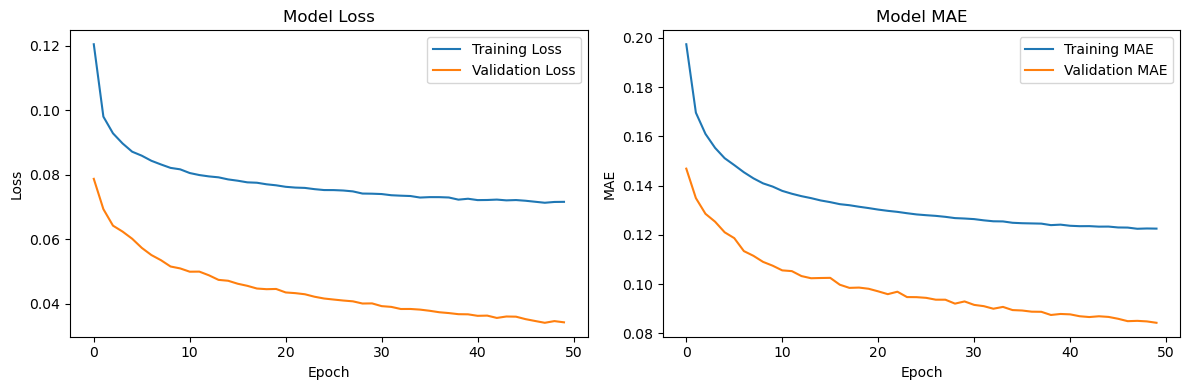


‚úÖ MAE Ïù∏ÏΩîÎçîÍ∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÌïôÏäµÎêòÏóàÏäµÎãàÎã§!
Ïù∏ÏΩîÎçî Ï∂úÎ†• Ï∞®Ïõê: (None, 64)


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

class MaskingLayer(layers.Layer):
    def __init__(self, mask_ratio=0.5, **kwargs):
        super(MaskingLayer, self).__init__(**kwargs)
        self.mask_ratio = mask_ratio
        
    def call(self, inputs, training=None):
        if training:
            # ÌïôÏäµ ÏãúÏóêÎßå ÎßàÏä§ÌÇπ Ï†ÅÏö©
            mask = tf.random.uniform(shape=tf.shape(inputs)) > self.mask_ratio
            masked_inputs = tf.where(mask, inputs, tf.zeros_like(inputs))
            return masked_inputs
        else:
            # ÌèâÍ∞Ä ÏãúÏóêÎäî ÎßàÏä§ÌÇπÌïòÏßÄ ÏïäÏùå
            return inputs

def build_encoder(input_shape):
   inputs = layers.Input(shape=input_shape)
   x = layers.Dense(256, activation='relu')(inputs)
   x = layers.Dropout(0.3)(x)
   x = layers.Dense(128, activation='relu')(x)
   x = layers.Dropout(0.2)(x)
   x = layers.Dense(64, activation='relu')(x)
   x = layers.Dropout(0.1)(x)
   latent = layers.Dense(64, activation='relu')(x)
   return models.Model(inputs, latent, name='encoder')
   
def build_decoder(latent_shape, output_dim):
   inputs = layers.Input(shape=latent_shape)
   x = layers.Dense(64, activation='relu')(inputs)
   x = layers.Dropout(0.1)(x)
   x = layers.Dense(128, activation='relu')(x)
   x = layers.Dropout(0.2)(x)
   x = layers.Dense(256, activation='relu')(x)
   x = layers.Dropout(0.3)(x)
   outputs = layers.Dense(output_dim, activation=None)(x)
   return models.Model(inputs, outputs, name='decoder')

def build_mae_model(input_shape, mask_ratio=0.5):
    """Í∞úÏÑ†Îêú MAE Î™®Îç∏ Íµ¨Ï∂ï"""
    
    # ÏûÖÎ†• Ï∞®Ïõê
    input_dim = input_shape[0] if isinstance(input_shape, tuple) else input_shape
    
    # Î™®Îç∏ Íµ¨ÏÑ±
    inputs = layers.Input(shape=(input_dim,))
    
    # ÎßàÏä§ÌÇπ (ÌïôÏäµ ÏãúÏóêÎßå)
    masked_inputs = MaskingLayer(mask_ratio=mask_ratio)(inputs)
    
    # Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî
    encoder = build_encoder((input_dim,))
    decoder = build_decoder((64,), input_dim)
    
    latent = encoder(masked_inputs)
    reconstructed = decoder(latent)
    
    # Ï†ÑÏ≤¥ Î™®Îç∏
    autoencoder = models.Model(inputs, reconstructed, name='mae_autoencoder')
    
    return autoencoder, encoder, decoder

def train_mae_model(X_train, X_val, mask_ratio=0.5, epochs=50, batch_size=64):
    """MAE Î™®Îç∏ ÌïôÏäµ"""
    
    # Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
    if hasattr(X_train, 'toarray'):
        X_train = X_train.toarray()
    if hasattr(X_val, 'toarray'):
        X_val = X_val.toarray()
    
    input_shape = X_train.shape[1]
    
    # Î™®Îç∏ Íµ¨Ï∂ï
    autoencoder, encoder, decoder = build_mae_model(input_shape, mask_ratio)
    
    # Ïª¥ÌååÏùº (MSE ÏÜêÏã§ ÏÇ¨Ïö© - MAEÏùò ÌëúÏ§Ä)
    autoencoder.compile(
        optimizer=RMSprop(learning_rate=0.001), 
        loss='mse',  # ÌëúÏ§Ä MSE ÏÇ¨Ïö©
        metrics=['mae']
    )
    
    # Ï°∞Í∏∞ Ï¢ÖÎ£å
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )
    
    print("MAE Î™®Îç∏ ÌïôÏäµ ÏãúÏûë...")
    print(f"ÏûÖÎ†• Ï∞®Ïõê: {input_shape}")
    print(f"ÎßàÏä§ÌÅ¨ ÎπÑÏú®: {mask_ratio}")
    
    # ÌïôÏäµ
    history = autoencoder.fit(
        X_train, X_train,
        validation_data=(X_val, X_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping],
        verbose=1
    )
    
    print(f"ÏµúÏ¢Ö ÌïôÏäµ ÏÜêÏã§: {history.history['loss'][-1]:.4f}")
    print(f"ÏµúÏ¢Ö Í≤ÄÏ¶ù ÏÜêÏã§: {history.history['val_loss'][-1]:.4f}")
    
    return autoencoder, encoder, decoder, history

# ÏÇ¨Ïö© ÏòàÏãú
print("="*50)
print("Í∞úÏÑ†Îêú MAE Î™®Îç∏ ÌïôÏäµ")
print("="*50)

autoencoder, mae_encoder, decoder, history = train_mae_model(
    X_train, X_val, 
    mask_ratio=0.5, 
    epochs=50, 
    batch_size=64
)

# ÌïôÏäµ Í≤∞Í≥º ÏãúÍ∞ÅÌôî (ÏÑ†ÌÉùÏÇ¨Ìï≠)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

print("\n‚úÖ MAE Ïù∏ÏΩîÎçîÍ∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÌïôÏäµÎêòÏóàÏäµÎãàÎã§!")
print(f"Ïù∏ÏΩîÎçî Ï∂úÎ†• Ï∞®Ïõê: {mae_encoder.output_shape}")

Federated Learning: Î≥ëÏõêÎ≥Ñ MAE+ANN ÏÑ±Îä• Î∂ÑÏÑù
Î∞úÍ≤¨Îêú Î≥ëÏõê: ['OPO1' 'OPO2' 'OPO3' 'OPO4' 'OPO5' 'OPO6']
OPO1: 32148Í∞ú ÏÉòÌîå
OPO2: 16145Í∞ú ÏÉòÌîå
OPO3: 12514Í∞ú ÏÉòÌîå
OPO4: 33641Í∞ú ÏÉòÌîå
OPO5: 15738Í∞ú ÏÉòÌîå
OPO6: 22915Í∞ú ÏÉòÌîå

MAE+ANN Federated Learning ÏãúÏûë...

Federated Learning MAE+ANN Î™®Îç∏ ÌïôÏäµ
Ï∞∏Ïó¨ Î≥ëÏõê Ïàò: 6
ÌïôÏäµ ÎùºÏö¥Îìú Ïàò: 3

--- Round 1/3 ---

OPO1 ÌïôÏäµ Ï§ë...

OPO2 ÌïôÏäµ Ï§ë...

OPO3 ÌïôÏäµ Ï§ë...

OPO4 ÌïôÏäµ Ï§ë...

OPO5 ÌïôÏäµ Ï§ë...

OPO6 ÌïôÏäµ Ï§ë...
Í∏ÄÎ°úÎ≤å Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏ ÏôÑÎ£å (6Í∞ú ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏)

--- Round 2/3 ---

OPO1 ÌïôÏäµ Ï§ë...

OPO2 ÌïôÏäµ Ï§ë...

OPO3 ÌïôÏäµ Ï§ë...

OPO4 ÌïôÏäµ Ï§ë...

OPO5 ÌïôÏäµ Ï§ë...

OPO6 ÌïôÏäµ Ï§ë...
Í∏ÄÎ°úÎ≤å Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏ ÏôÑÎ£å (6Í∞ú ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏)

--- Round 3/3 ---

OPO1 ÌïôÏäµ Ï§ë...
  F1: 0.904, Precision: 0.867, Recall: 0.943, AUC: 0.996

OPO2 ÌïôÏäµ Ï§ë...
  F1: 0.855, Precision: 0.796, Recall: 0.923, AUC: 0.995

OPO3 ÌïôÏäµ Ï§ë...
  F1: 0.822, Precision: 0.770, R

C:\Users\Ïù¥Ìù¨Ï∞Ω\AppData\Local\Temp\ipykernel_9840\488701607.py:268: UserWarning: Glyph 48337 (\N{HANGUL SYLLABLE BYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Ïù¥Ìù¨Ï∞Ω\AppData\Local\Temp\ipykernel_9840\488701607.py:268: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Ïù¥Ìù¨Ï∞Ω\AppData\Local\Temp\ipykernel_9840\488701607.py:268: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Ïù¥Ìù¨Ï∞Ω\AppData\Local\Temp\ipykernel_9840\488701607.py:268: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Ïù¥Ìù¨Ï∞Ω\AppData\Local\Temp\ipykernel_9840\488701607.py:268: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Ïù¥Ìù¨Ï∞Ω\AppData\Local\Temp\ipykernel_9840\488701607.py:268: UserWarning: Glyph 48516 (\N{HANGU

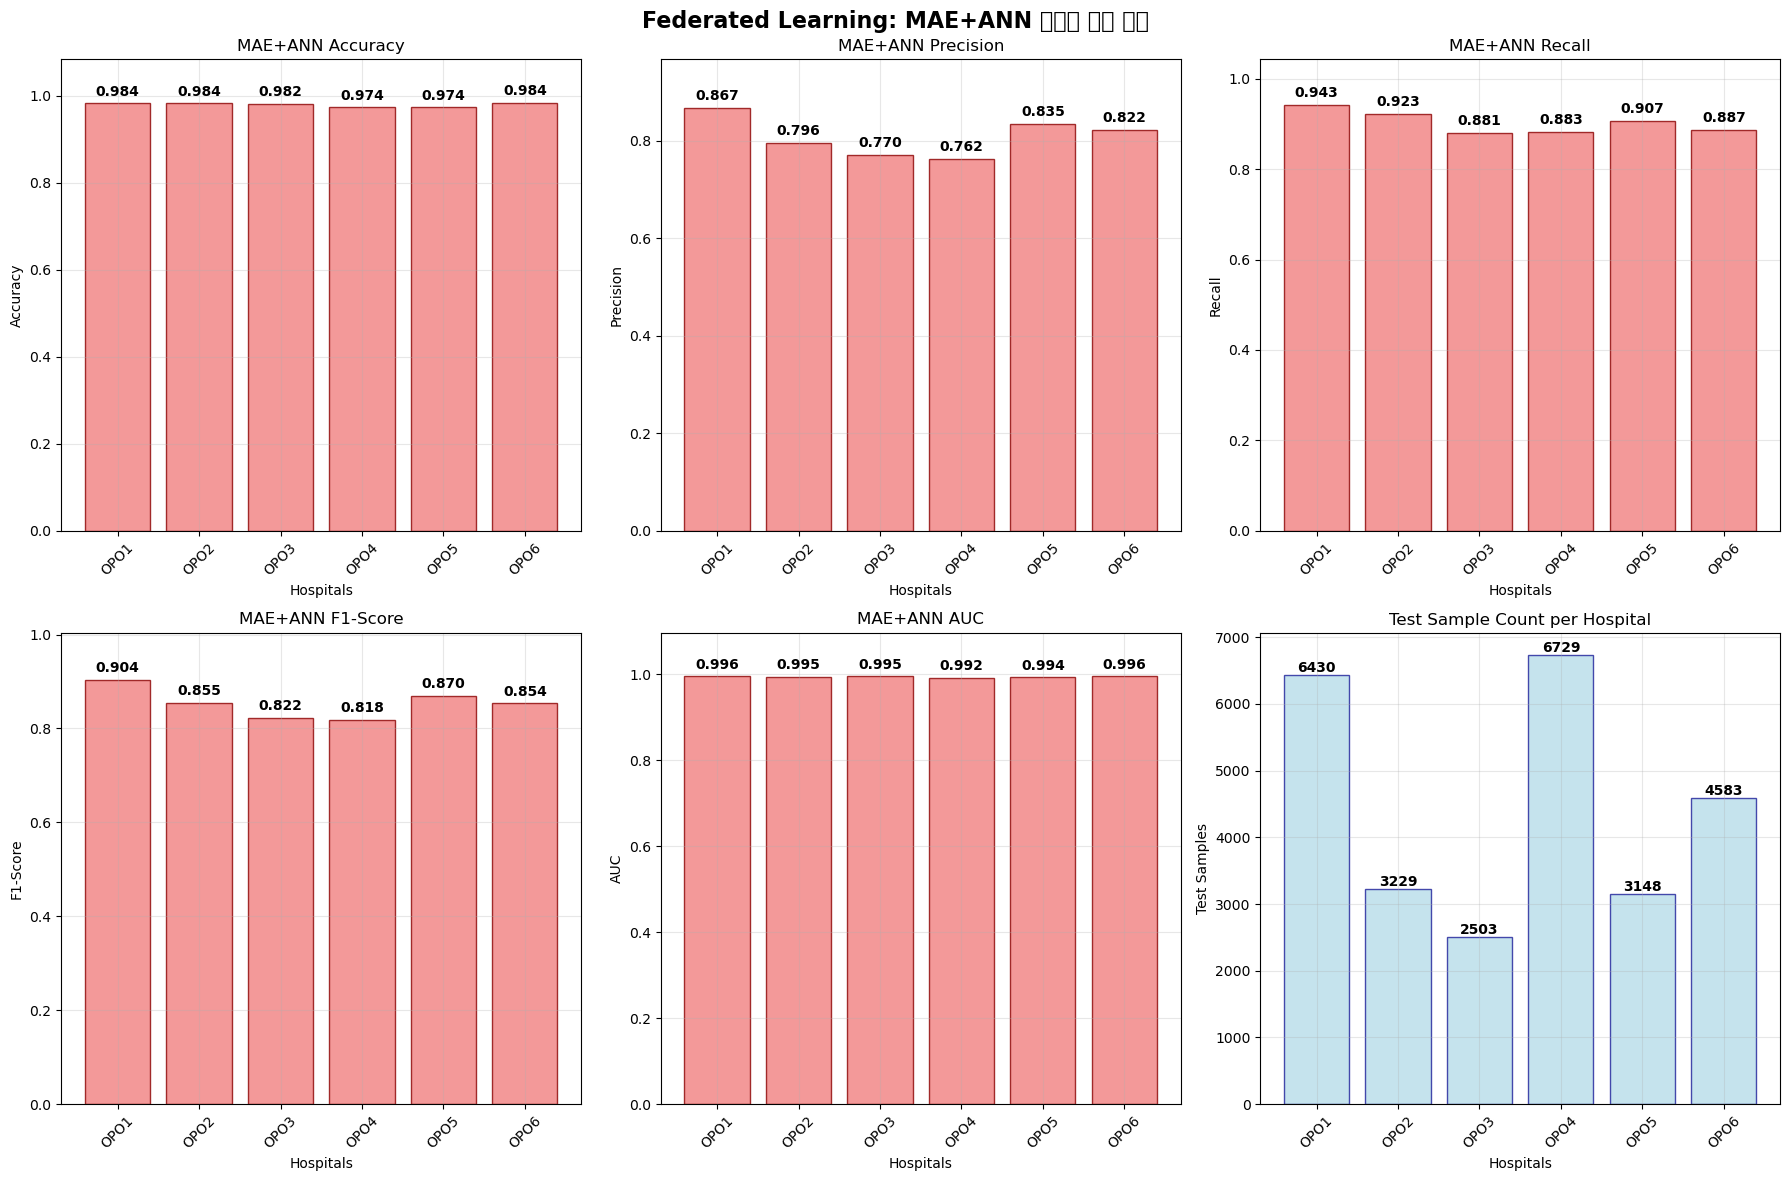

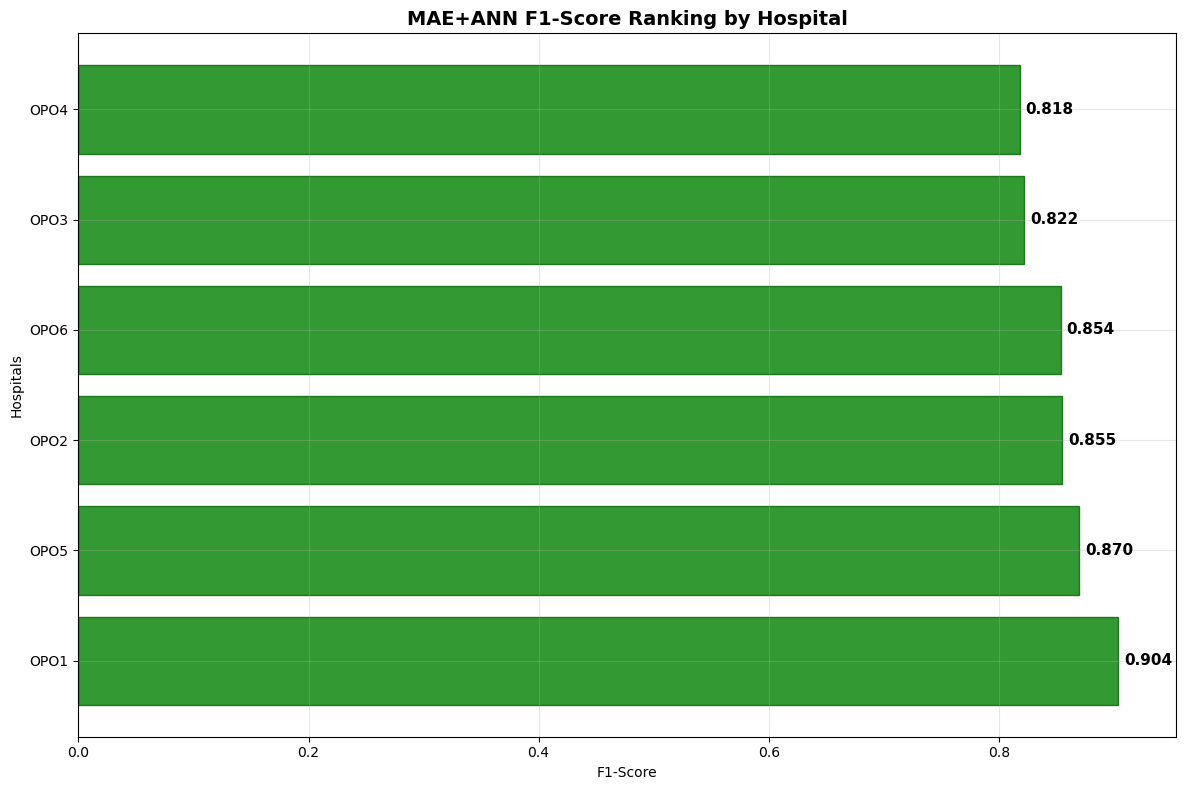


‚úÖ Federated Learning ÏôÑÎ£å!
Ï∞∏Ïó¨ Î≥ëÏõê Ïàò: 6
Í∞Å Î≥ëÏõêÎ≥ÑÎ°ú MAE+ANN Î™®Îç∏ÏùÑ ÌòëÎ†• ÌïôÏäµÌñàÏäµÎãàÎã§.


In [4]:
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model, clone_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns

def to_dense(data):
    if hasattr(data, 'toarray'):
        return data.toarray()
    return data

def split_data_by_hospital(X, y, df_original):
    """OPOÎ≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨"""
    hospitals = {}
    
    # OPO Ïª¨ÎüºÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏
    if 'OPO' in df_original.columns:
        opo_col = 'OPO'
    else:
        # OPO Í¥ÄÎ†® Ïª¨Îüº Ï∞æÍ∏∞
        opo_cols = [col for col in df_original.columns if 'OPO' in col.upper()]
        if opo_cols:
            opo_col = opo_cols[0]
        else:
            # ÏûÑÏãúÎ°ú Î≥ëÏõê ID ÏÉùÏÑ± (Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Ïã§Ï†ú Î≥ëÏõê Ïª¨Îüº ÏÇ¨Ïö©)
            print("OPO Ïª¨ÎüºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏñ¥ ÏûÑÏãúÎ°ú Î≥ëÏõê IDÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.")
            n_samples = len(y)
            hospital_ids = np.random.choice(['OPO1', 'OPO2', 'OPO3', 'OPO4', 'OPO5', 'OPO6'], 
                                          size=n_samples, 
                                          p=[0.2, 0.15, 0.18, 0.17, 0.15, 0.15])
            opo_values = hospital_ids
    
    if 'opo_values' not in locals():
        opo_values = df_original[opo_col].values
    
    # Í∞Å Î≥ëÏõêÎ≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
    unique_hospitals = np.unique(opo_values)
    print(f"Î∞úÍ≤¨Îêú Î≥ëÏõê: {unique_hospitals}")
    
    for hospital in unique_hospitals:
        if hospital in ['OPO1', 'OPO2', 'OPO3', 'OPO4', 'OPO5', 'OPO6']:
            mask = opo_values == hospital
            X_hospital = X[mask]
            y_hospital = y[mask]
            
            if len(y_hospital) > 10:  # ÏµúÏÜå ÏÉòÌîå Ïàò ÌôïÏù∏
                hospitals[hospital] = {
                    'X': X_hospital,
                    'y': y_hospital,
                    'size': len(y_hospital)
                }
                print(f"{hospital}: {len(y_hospital)}Í∞ú ÏÉòÌîå")
    
    return hospitals

class FederatedLearningCoordinator:
    def __init__(self):
        self.global_weights = None
        self.client_weights = []
        
    def aggregate_weights(self, client_weights_list):
        """ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ Í∞ÄÏ§ëÏπòÎì§ÏùÑ ÌèâÍ∑†ÌôîÌïòÏó¨ Í∏ÄÎ°úÎ≤å Í∞ÄÏ§ëÏπò ÏÉùÏÑ±"""
        if not client_weights_list:
            return None
            
        # Í∞Å Î†àÏù¥Ïñ¥Î≥ÑÎ°ú Í∞ÄÏ§ëÏπò ÌèâÍ∑†Ìôî
        global_weights = []
        for layer_idx in range(len(client_weights_list[0])):
            layer_weights = [weights[layer_idx] for weights in client_weights_list]
            avg_weights = np.mean(layer_weights, axis=0)
            global_weights.append(avg_weights)
            
        return global_weights
    
    def update_global_weights(self, client_weights_list):
        """Í∏ÄÎ°úÎ≤å Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏"""
        self.global_weights = self.aggregate_weights(client_weights_list)
        return self.global_weights

def create_mae_ann_model(input_dim):
    """MAE+ANN Î™®Îç∏ ÏÉùÏÑ±"""
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dropout(0.15),
        Dense(32, activation='relu'),
        Dropout(0.07),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.0007), 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])
    return model

def train_federated_mae_model(hospitals_data, encoder, n_rounds=5):
    """Federated LearningÏúºÎ°ú MAE+ANN Î™®Îç∏ ÌïôÏäµ"""
    coordinator = FederatedLearningCoordinator()
    hospital_results = {}
    
    print(f"\n{'='*60}")
    print(f"Federated Learning MAE+ANN Î™®Îç∏ ÌïôÏäµ")
    print(f"{'='*60}")
    print(f"Ï∞∏Ïó¨ Î≥ëÏõê Ïàò: {len(hospitals_data)}")
    print(f"ÌïôÏäµ ÎùºÏö¥Îìú Ïàò: {n_rounds}")
    
    for round_num in range(n_rounds):
        print(f"\n--- Round {round_num + 1}/{n_rounds} ---")
        client_weights = []
        
        for hospital_name, data in hospitals_data.items():
            print(f"\n{hospital_name} ÌïôÏäµ Ï§ë...")
            
            # Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
            X_hospital = data['X']
            y_hospital = data['y']
            
            if len(y_hospital) < 20:
                print(f"{hospital_name}: ÏÉòÌîå ÏàòÍ∞Ä ÎÑàÎ¨¥ Ï†ÅÏùå ({len(y_hospital)}Í∞ú)")
                continue
            
            # ÌõàÎ†®/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
            X_temp, X_test, y_temp, y_test = train_test_split(
                X_hospital, y_hospital, test_size=0.2, random_state=42, stratify=y_hospital
            )
            
            if len(y_temp) < 10:
                print(f"{hospital_name}: ÌõàÎ†® ÏÉòÌîå ÏàòÍ∞Ä ÎÑàÎ¨¥ Ï†ÅÏùå")
                continue
                
            X_train, X_val, y_train, y_val = train_test_split(
                X_temp, y_temp, test_size=0.25, random_state=42, 
                stratify=y_temp if len(np.unique(y_temp)) > 1 else None
            )
            
            # Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
            X_train_dense = to_dense(X_train)
            X_val_dense = to_dense(X_val)
            X_test_dense = to_dense(X_test)
            
            # MAE Ïù∏ÏΩîÎî©Îêú ÌäπÏÑ± Ï∂îÍ∞Ä
            X_train_encoded = encoder.predict(X_train_dense, verbose=0)
            X_val_encoded = encoder.predict(X_val_dense, verbose=0)
            X_test_encoded = encoder.predict(X_test_dense, verbose=0)
            
            X_train_combined = tf.concat([X_train_dense, X_train_encoded], axis=-1)
            X_val_combined = tf.concat([X_val_dense, X_val_encoded], axis=-1)
            X_test_combined = tf.concat([X_test_dense, X_test_encoded], axis=-1)
            
            input_dim = X_train_combined.shape[1]
            model = create_mae_ann_model(input_dim)
            
            # Í∏ÄÎ°úÎ≤å Í∞ÄÏ§ëÏπòÍ∞Ä ÏûàÏúºÎ©¥ Ï†ÅÏö©
            if coordinator.global_weights is not None:
                model.set_weights(coordinator.global_weights)
            
            # Î°úÏª¨ ÌïôÏäµ
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, 
                                         restore_best_weights=True, verbose=0)
            
            history = model.fit(
                X_train_combined, y_train,
                validation_data=(X_val_combined, y_val),
                epochs=20,  # Federated learningÏóêÏÑúÎäî Ï†ÅÏùÄ epoch ÏÇ¨Ïö©
                batch_size=32,
                callbacks=[early_stopping],
                verbose=0
            )
            
            # Î°úÏª¨ Í∞ÄÏ§ëÏπò ÏàòÏßë
            client_weights.append(model.get_weights())
            
            # ÏÑ±Îä• ÌèâÍ∞Ä (ÎßàÏßÄÎßâ ÎùºÏö¥ÎìúÏóêÏÑúÎßå)
            if round_num == n_rounds - 1:
                y_test_prob = model.predict(X_test_combined, verbose=0).flatten()
                y_test_pred = (y_test_prob >= 0.5).astype(int)
                
                if len(np.unique(y_test)) > 1:  # ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïóê ÏñëÏÑ±Í≥º ÏùåÏÑ±Ïù¥ Î™®Îëê ÏûàÎäî Í≤ΩÏö∞Îßå
                    test_accuracy = accuracy_score(y_test, y_test_pred)
                    test_precision = precision_score(y_test, y_test_pred, zero_division=0)
                    test_recall = recall_score(y_test, y_test_pred, zero_division=0)
                    test_f1 = f1_score(y_test, y_test_pred, zero_division=0)
                    test_auc = roc_auc_score(y_test, y_test_prob) if len(np.unique(y_test)) > 1 else 0.5
                    
                    hospital_results[hospital_name] = {
                        'accuracy': test_accuracy,
                        'precision': test_precision,
                        'recall': test_recall,
                        'f1': test_f1,
                        'auc': test_auc,
                        'samples': len(y_test)
                    }
                    
                    print(f"  F1: {test_f1:.3f}, Precision: {test_precision:.3f}, Recall: {test_recall:.3f}, AUC: {test_auc:.3f}")
        
        # Í∏ÄÎ°úÎ≤å Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏
        if client_weights:
            coordinator.update_global_weights(client_weights)
            print(f"Í∏ÄÎ°úÎ≤å Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏ ÏôÑÎ£å ({len(client_weights)}Í∞ú ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏)")
    
    return hospital_results

def plot_mae_results(mae_results):
    """MAE+ANN Í≤∞Í≥º ÏãúÍ∞ÅÌôî"""
    hospitals = list(mae_results.keys())
    
    if not hospitals:
        print("ÏãúÍ∞ÅÌôîÌï† Î≥ëÏõê Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
        return
    
    # ÏÑ±Îä• ÏßÄÌëúÎ≥Ñ ÏãúÍ∞ÅÌôî
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']
    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Federated Learning: MAE+ANN Î≥ëÏõêÎ≥Ñ ÏÑ±Îä• Î∂ÑÏÑù', fontsize=16, fontweight='bold')
    
    for idx, (metric, metric_name) in enumerate(zip(metrics, metric_names)):
        row = idx // 3
        col = idx % 3
        ax = axes[row, col]
        
        scores = [mae_results[hospital][metric] for hospital in hospitals]
        
        # ÎßâÎåÄ Í∑∏ÎûòÌîÑ
        bars = ax.bar(hospitals, scores, alpha=0.8, color='lightcoral', edgecolor='darkred')
        
        ax.set_xlabel('Hospitals')
        ax.set_ylabel(metric_name)
        ax.set_title(f'MAE+ANN {metric_name}')
        ax.grid(True, alpha=0.3)
        
        # Í∞í ÌëúÏãú
        for bar, score in zip(bars, scores):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{score:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        # yÏ∂ï Î≤îÏúÑ Ï°∞Ï†ï
        ax.set_ylim(0, min(1.1, max(scores) + 0.1))
        plt.setp(ax.get_xticklabels(), rotation=45)
    
    # ÎßàÏßÄÎßâ subplot: ÏÉòÌîå Ïàò ÌëúÏãú
    ax = axes[1, 2]
    sample_counts = [mae_results[hospital]['samples'] for hospital in hospitals]
    
    bars = ax.bar(hospitals, sample_counts, alpha=0.7, color='lightblue', edgecolor='darkblue')
    ax.set_xlabel('Hospitals')
    ax.set_ylabel('Test Samples')
    ax.set_title('Test Sample Count per Hospital')
    ax.grid(True, alpha=0.3)
    
    # Í∞í ÌëúÏãú
    for bar, count in zip(bars, sample_counts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
               f'{count}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Ï∂îÍ∞Ä: ÏÑ±Îä• ÏàúÏúÑ Ï∞®Ìä∏
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # F1 Ï†êÏàò Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
    sorted_hospitals = sorted(hospitals, key=lambda h: mae_results[h]['f1'], reverse=True)
    f1_scores = [mae_results[hospital]['f1'] for hospital in sorted_hospitals]
    
    bars = ax.barh(sorted_hospitals, f1_scores, alpha=0.8, color='green', edgecolor='darkgreen')
    ax.set_xlabel('F1-Score')
    ax.set_ylabel('Hospitals')
    ax.set_title('MAE+ANN F1-Score Ranking by Hospital', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Í∞í ÌëúÏãú
    for bar, score in zip(bars, f1_scores):
        width = bar.get_width()
        ax.text(width + 0.005, bar.get_y() + bar.get_height()/2.,
               f'{score:.3f}', ha='left', va='center', fontsize=11, fontweight='bold')
    
    ax.set_xlim(0, min(1.0, max(f1_scores) + 0.05))
    plt.tight_layout()
    plt.show()

# Ïã§Ìñâ ÏΩîÎìú
print("="*60)
print("Federated Learning: Î≥ëÏõêÎ≥Ñ MAE+ANN ÏÑ±Îä• Î∂ÑÏÑù")
print("="*60)

# Î≥ëÏõêÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
hospitals_data = split_data_by_hospital(X_preprocessed, y, df_new)

if len(hospitals_data) == 0:
    print("Î≥ëÏõê Îç∞Ïù¥ÌÑ∞Î•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. ÏûÑÏãú Îç∞Ïù¥ÌÑ∞Î°ú ÏãúÏó∞Ìï©ÎãàÎã§.")
    # ÏûÑÏãúÎ°ú Îç∞Ïù¥ÌÑ∞Î•º 6Í∞ú Î≥ëÏõêÏúºÎ°ú Î∂ÑÌï†
    n_samples = len(y)
    n_hospitals = 6
    samples_per_hospital = n_samples // n_hospitals
    
    hospitals_data = {}
    for i in range(n_hospitals):
        start_idx = i * samples_per_hospital
        end_idx = (i + 1) * samples_per_hospital if i < n_hospitals - 1 else n_samples
        
        hospital_name = f'OPO{i+1}'
        hospitals_data[hospital_name] = {
            'X': X_preprocessed[start_idx:end_idx],
            'y': y.iloc[start_idx:end_idx],
            'size': end_idx - start_idx
        }
        print(f"{hospital_name}: {end_idx - start_idx}Í∞ú ÏÉòÌîå")

# MAE+ANN Federated Learning ÌïôÏäµ
print("\nMAE+ANN Federated Learning ÏãúÏûë...")
mae_ann_results = train_federated_mae_model(hospitals_data, encoder=mae_encoder, n_rounds=3)

# Í≤∞Í≥º Ï∂úÎ†•
print("\n" + "="*80)
print("Î≥ëÏõêÎ≥Ñ MAE+ANN ÏÑ±Îä• Í≤∞Í≥º")
print("="*80)

if mae_ann_results:
    print(f"{'Î≥ëÏõê':<8} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'AUC':<10} {'Samples':<8}")
    print("-" * 80)
    
    for hospital in sorted(mae_ann_results.keys()):
        result = mae_ann_results[hospital]
        print(f"{hospital:<8} {result['accuracy']:<10.3f} {result['precision']:<10.3f} {result['recall']:<10.3f} {result['f1']:<10.3f} {result['auc']:<10.3f} {result['samples']:<8}")
    
    # Ï†ÑÏ≤¥ ÌèâÍ∑† ÏÑ±Îä•
    print(f"\nÏ†ÑÏ≤¥ ÌèâÍ∑† ÏÑ±Îä•:")
    avg_f1 = np.mean([mae_ann_results[h]['f1'] for h in mae_ann_results.keys()])
    avg_precision = np.mean([mae_ann_results[h]['precision'] for h in mae_ann_results.keys()])
    avg_recall = np.mean([mae_ann_results[h]['recall'] for h in mae_ann_results.keys()])
    avg_auc = np.mean([mae_ann_results[h]['auc'] for h in mae_ann_results.keys()])
    
    print(f"ÌèâÍ∑† F1-Score: {avg_f1:.3f}")
    print(f"ÌèâÍ∑† Precision: {avg_precision:.3f}")
    print(f"ÌèâÍ∑† Recall: {avg_recall:.3f}")
    print(f"ÌèâÍ∑† AUC: {avg_auc:.3f}")
    
    # ÏµúÍ≥†/ÏµúÏ†Ä ÏÑ±Îä• Î≥ëÏõê
    best_hospital = max(mae_ann_results.keys(), key=lambda h: mae_ann_results[h]['f1'])
    worst_hospital = min(mae_ann_results.keys(), key=lambda h: mae_ann_results[h]['f1'])
    
    print(f"\nüèÜ ÏµúÍ≥† ÏÑ±Îä• Î≥ëÏõê: {best_hospital} (F1: {mae_ann_results[best_hospital]['f1']:.3f})")
    print(f"üìà ÏµúÏ†Ä ÏÑ±Îä• Î≥ëÏõê: {worst_hospital} (F1: {mae_ann_results[worst_hospital]['f1']:.3f})")
    print(f"ÏÑ±Îä• Ï∞®Ïù¥: {(mae_ann_results[best_hospital]['f1'] - mae_ann_results[worst_hospital]['f1'])*100:.1f}%")
    
    # ÏãúÍ∞ÅÌôî
    plot_mae_results(mae_ann_results)
    
else:
    print("ÌïôÏäµ Í≤∞Í≥ºÍ∞Ä ÏóÜÏäµÎãàÎã§.")

print(f"\n‚úÖ Federated Learning ÏôÑÎ£å!")
print(f"Ï∞∏Ïó¨ Î≥ëÏõê Ïàò: {len(mae_ann_results)}")
print(f"Í∞Å Î≥ëÏõêÎ≥ÑÎ°ú MAE+ANN Î™®Îç∏ÏùÑ ÌòëÎ†• ÌïôÏäµÌñàÏäµÎãàÎã§.")